# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  

### Цель исследования:   
1. Определить рыночную стоимость обьектов недвижимости.  
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.  
3. Установить какие факторы влияют на ценообразование стоимости квартир. 

### Ход исследования  
Данные о недвижимости я получу из файла /datasets/real_estate_data.csv. О качестве данных  
ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных. Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки  
я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного  
результата. Далее создадим необходимые столбцы и приступим к проведению исследовательского  
анализа.  
Таким образом мое исследование пройдет в семь этапов:  
1. Обзор данных  
2. Предобработка данных  
3. Расчеты и добавление результатов в таблицу  
4. Проведение анализа для Ленинградской области  
5. Проведение анализа для Санкт-Петербурга  
6. Различаются ли факторы, которые влияют на ценообразование стоимости квартир  
7. Написание общего вывода

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Запросим атрибуты таблицы методом info():

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Вывод  
В данных заметил следующее:  
first_day_exposition - должен быть тип datetime;  
ceiling_height - есть нулевые значения;  
floors_total - должен быть тип int, есть нулевые значения;  
living_area - есть нулевые значения;  
is_apartment - должен быть тип bool, есть нулевые значения;  
kitchen_area - есть нулевые значения;  
balcony - есть нулевые значения;  
locality_name - есть нулевые значения;  
airports_nearest - есть нулевые значения;  
cityCenters_nearest - есть нулевые значения;  
parks_around3000 - должен быть тип int, есть нулевые значения;  
parks_nearest - есть нулевые значения;  
ponds_around3000 - должен быть тип int, есть нулевые значения;  
ponds_nearest - есть нулевые значения;  
days_exposition - должен быть тип int, есть нулевые значения.  

Построим гистограммы, посмотрим на общуую картину.

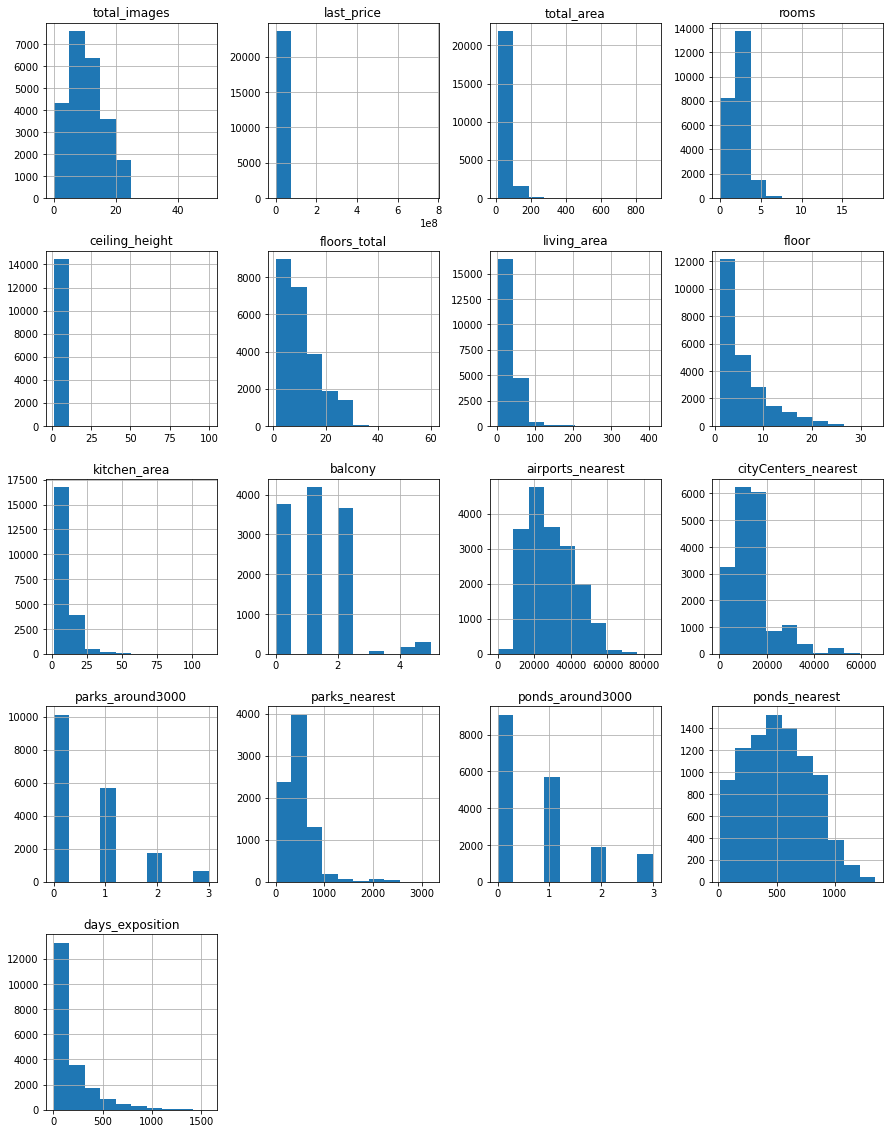

In [4]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных.

Выведим количество пропущенных значений для каждого столбца

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Приведем к типу int last_price(стоимость квартир) для удобства прочтения.

In [6]:
data['last_price'] = data['last_price'].astype(int)

Приведем first_day_exposition(дата публикации) к типу datetime

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Смотрим количество значений в is_apartment(апартаментах). Всего 50. Возможно это связано с тем, что люди не видят разницы в названиях квартир и апартаментов. Предлагаю заменить пропущенные значения на false. А так же поменять на тип bool.

In [8]:
data['is_apartment'].value_counts()
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype('bool')

balcony(число балконов) - предполагаю, что пропущенные значения это отсутствие балконов, люди просто не заморачиваясь не писали ничего. Заменим пропущенные значения на 0, а так же приведем к типу int.

In [9]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

parks_around3000(число парков в радиусе 3 км) - та же история, что и с балконами, заменим пропущенные значения на 0 и приведем к типу int.

In [10]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)

ponds_around3000(число водоёмов в радиусе 3 км) - заменим пропущенные значения на 0 и приведем к типу int.

In [11]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

locality_name(название населённого пункта) - довольно странно почему люди не указывают название населенного пункта, так как это влияет на цену, пропусков здесь не так много, поэтому удаляю пропущенные записи.

In [12]:
data.dropna(subset=['locality_name'], inplace=True)

floors_total(всего этажей в доме) - так же есть пропуски, но их не так много, поэтому тоже удаляем и меняем тип на int.

In [13]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)

ceiling_height(высота потолков) - могу предположить, что многие пропустили этот пункт, решив, что это неважная информация. Предлагаю заменить отсутствующие данные на медианное значение.

In [14]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

living_area(жилая площадь в квадратных метрах (м²)) и kitchen_area(площадь кухни в квадратных метрах (м²)) - так же пропуска, возможно люди просто не заморачивались, либо данные были необязательные к заполнению. Тут предлагаю заполнить пропуска средним значением

In [15]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

Пропуски в cityCenters_nearest(расстояние до центра города (м)), airports_nearest(расстояние до ближайшего аэропорта в метрах (м)), parks_nearest(расстояние до ближайшего парка (м)), ponds_nearest(расстояние до ближайшего водоёма (м)) предлагаю не трогатью

In [16]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Поищем неявные дубликаты в названиях населённых пунктов.

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Нашли следующие дубликаты :  
'посёлок Мурино' 'поселок Мурино' 'Мурино'  
'поселок Новый Свет' 'посёлок Новый Свет'  
'посёлок Бугры' 'поселок Бугры'  
'поселок городского типа Красный Бор' 'посёлок городского типа Красный Бор'  

'посёлок Пансионат Зелёный Бор' 'поселок Пансионат Зелёный Бор'  

'посёлок Усть-Луга' 'поселок Усть-Луга'  
'поселок городского типа Лебяжье' 'посёлок городского типа Лебяжье'  
'посёлок городского типа имени Свердлова' 'поселок городского типа имени Свердлова'  
'поселок Тельмана' 'посёлок Тельмана'  
'поселок Рябово' 'поселок городского типа Рябово' 'посёлок городского типа Рябово'  

Устраним неявные дубликаты.  

In [18]:
data['locality_name'] = data['locality_name'].replace('поселок Мурино','посёлок Мурино')
data['locality_name'] = data['locality_name'].replace('Мурино','посёлок Мурино')
data['locality_name'] = data['locality_name'].replace('поселок Новый Свет','посёлок Новый Свет')
data['locality_name'] = data['locality_name'].replace('поселок Бугры','посёлок Бугры')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Красный Бор','посёлок городского типа Красный Бор')
data['locality_name'] = data['locality_name'].replace('поселок Пансионат Зелёный Бор','посёлок Пансионат Зелёный Бор')
data['locality_name'] = data['locality_name'].replace('поселок Усть-Луга' ,'посёлок Усть-Луга')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Лебяжье' ,'посёлок городского типа Лебяжье')
data['locality_name'] = data['locality_name'].replace('поселок городского типа имени Свердлова' ,'посёлок городского типа имени Свердлова')
data['locality_name'] = data['locality_name'].replace('поселок Тельмана' ,'посёлок Тельмана')
data['locality_name'] = data['locality_name'].replace('поселок Рябово' ,'посёлок городского типа Рябово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово' ,'посёлок городского типа Рябово')

Проверим аномальные значения в столбце ceiling_height.

(-5.0, 40.0)

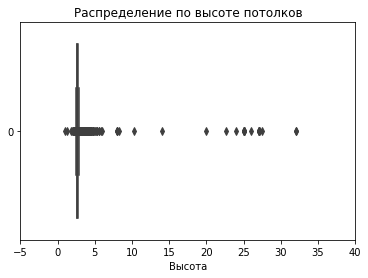

In [19]:
sns.boxplot(data=data['ceiling_height'], orient="h")
plt.title("Распределение по высоте потолков")
plt.xlabel("Высота")
plt.xlim(-5, 40)

Видны выбросы, таких высоких потолков даже в царских хоромах думаю нет)

In [20]:
data['ceiling_height'].sort_values()
data[data['ceiling_height'] > 8].sort_values('ceiling_height').head(30)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5863,20,5650000,45.0,2018-08-15,1,8.3,16,19.3,14,False,...,8.300000,1,Санкт-Петербург,13069.0,10763.0,0,NaN,1,613.0,14.0
22309,20,5300000,45.0,2017-09-30,1,10.3,16,15.5,15,False,...,7.878357,0,Санкт-Петербург,36353.0,11936.0,2,440.0,2,450.0,136.0
15061,19,5600000,56.4,2018-05-11,2,14.0,14,32.4,5,False,...,9.100000,2,Санкт-Петербург,14814.0,13610.0,0,NaN,0,NaN,315.0
17496,15,6700000,92.9,2019-02-19,3,20.0,17,53.2,14,False,...,12.000000,5,Санкт-Петербург,16295.0,15092.0,1,967.0,0,NaN,NaN
20507,12,5950000,60.0,2018-02-19,2,22.6,14,35.0,11,False,...,13.000000,1,Санкт-Петербург,27028.0,12570.0,0,NaN,0,NaN,40.0
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,5.500000,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,9.664118,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0
18545,6,3750000,43.0,2019-03-18,2,25.0,5,29.0,3,False,...,7.528208,0,Санкт-Петербург,27054.0,8033.0,1,540.0,0,NaN,12.0
14382,9,1700000,35.0,2015-12-04,1,25.0,5,20.0,2,False,...,8.000000,1,посёлок Новый Свет,NaN,NaN,0,NaN,0,NaN,206.0
9379,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,False,...,5.200000,0,Санкт-Петербург,11647.0,13581.0,0,NaN,0,NaN,NaN


Аномальный значения высоты потолков, решил заменить медианой.

In [21]:
data.loc[data['ceiling_height'] > 8, 'ceiling_height'] = data['ceiling_height'].median()

Проверим, что получилось.

(0.0, 3.0)

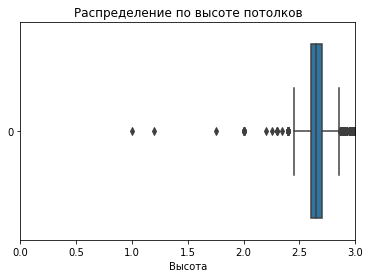

In [22]:
sns.boxplot(data=data['ceiling_height'], orient="h")
plt.title("Распределение по высоте потолков")
plt.xlabel("Высота")
plt.xlim(0, 3)


Потолок в 8 м., мне тоже кажется высоко, ну допустим в Питере я не был, мало ли.

Проверим на явные дубликаты.

In [23]:
data.duplicated().sum()

0

### Вывод:
Данные довольно 'грязные', много пропущенных значений, есть аномальные значения, присутствуют  
неявные дубликаты в названии населенных пунктов. Явных дубликатов не обнаруженно.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец со стоимостью квадратного метра (sq_price) и приведем к типу int.

In [24]:
data['sq_price'] = data['last_price'] / data['total_area']
data['sq_price'] = data['sq_price'].astype(int)

Добавим столбцы дня недели, месяца и года

In [55]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Создадим функцию для заполнения нового столбца по типу этажа квартиры.

In [26]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой' 
data['floor_category'] = data.apply(floor_category, axis = 1)

Посчитаем и добавим в таблицу: расстояние в км до центра города и округлим до целых значений.

### Проведите исследовательский анализ данных

Изучим и опишем общую площадь.

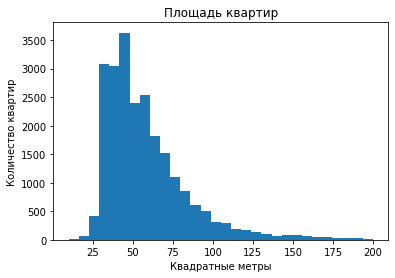

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [27]:
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

data['total_area'].describe()


Распределение данных нормальное, есть выбросы но они не сильно влияют на данные, большинство квартир до 100 кв м., пик приходится на 52 кв.м.

Изучим и опишем жилую площадь.

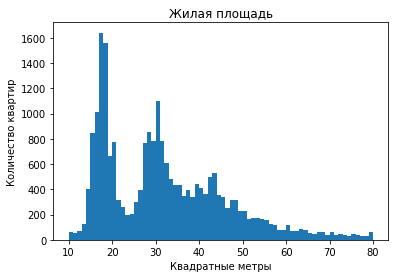

count    23565.000000
mean        34.592277
std         22.373679
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [28]:
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['living_area'].describe()

Распределение нормальное, пик приходится на 30 кв.м., средняя площадь 34.6 кв.м.

Изучим и опишем площадь кухни.

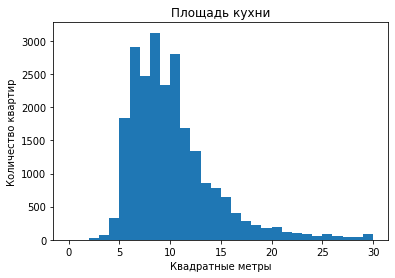

count    23565.000000
mean        10.499898
std          6.037750
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [29]:
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['kitchen_area'].describe()

Средняя площадь кухни составляет 10.49 кв.м., большинство кухонь размером 9 кв.м.

Изучим и опишем цену квартир.

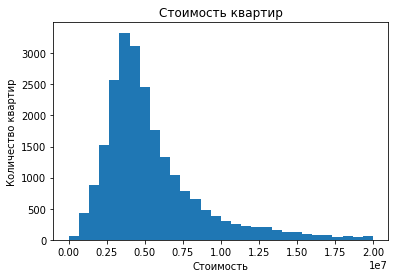

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [30]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

data['last_price'].describe()

В среднем квартиры стоят 6.54 млн., пик стоимости 4.64 млн.

Изучим количество комнат.

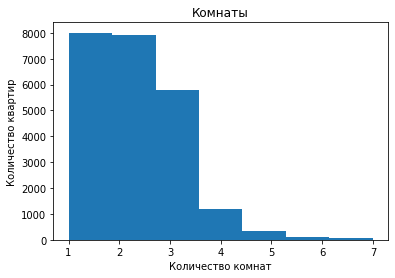

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [31]:
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
data['rooms'].describe()

Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.

Изучим высоту потолков.

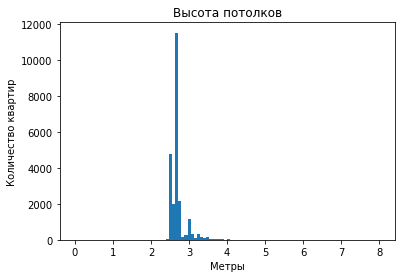

count    23565.000000
mean         2.697422
std          0.229776
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.000000
Name: ceiling_height, dtype: float64

In [32]:
plt.hist(data['ceiling_height'], bins=100, range=(0,8))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
data['ceiling_height'].describe()

Высота потолков в среднем составляет 2,77 м, медиана 2,65 м.

Оценим этажи квартир.

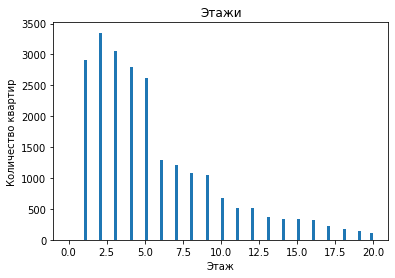

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [33]:
plt.hist(data['floor'], bins=100, range=(0,20))
plt.title('Этажи')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

data['floor'].describe()

Большинство квартир находится на 4 этаже.

Изучим тип этажа квартир («первый», «последний», «другой»)

другой       17326
последний     3330
первый        2909
Name: floor_category, dtype: int64

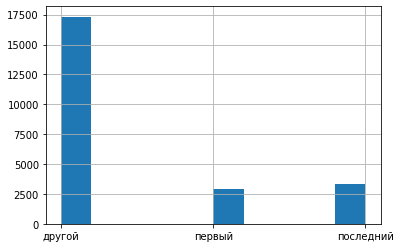

In [34]:
data['floor_category'].hist()
data['floor_category'].value_counts()


Как и ожидал, большинство квартир расположены между первым и последним этажом) 

Изучим общее количество этажей в домах.

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

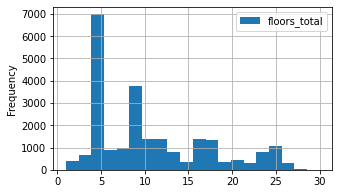

In [35]:
data.plot(y = 'floors_total', kind = 'hist', bins = 20, range = (1,30), grid=True, figsize = (5,3))
data['floors_total'].describe()


Большинство зданий 5  и 9 этажные.

Изучим расстояние до центра города.

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

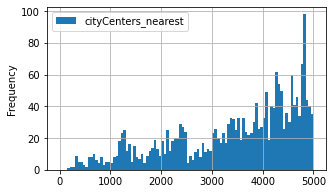

In [36]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, range = (1,5000), grid=True, figsize = (5,3))
data['cityCenters_nearest'].describe()

Большинство домов расположены в пределах 13 км от центра города.

Изучим расстояние до ближайшего аэропорта.

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

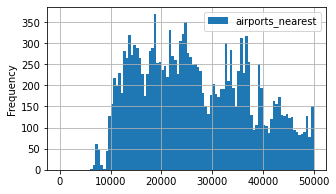

In [37]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, range = (1,50000), grid=True, figsize = (5,3))
data['airports_nearest'].describe()

Большинство квартир расположены на расстоянии 26,7 км

Изучим расстояние расстояние до ближайшего парка.

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

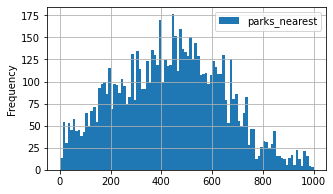

In [38]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, range = (1,1000), grid=True, figsize = (5,3))
data['parks_nearest'].describe()

У большинства квартир парк находится на расстоянии 450 м.

Посмотрим на день, месяц и год публикации объявления

count    23565.000000
mean      2017.371016
std          1.037393
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64

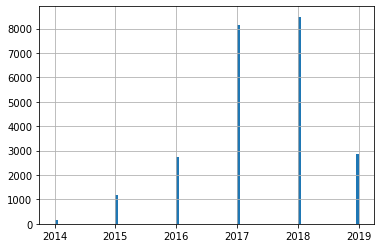

In [39]:
data['year'].hist(bins=100, range=(2014,2019))
data['year'].describe()


Большинство обьявлений выложены на сайте 2018 и 2017.

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

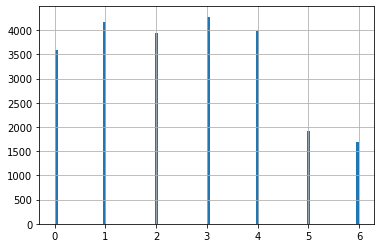

In [40]:
data['weekday'].hist(bins=100, range=(0,6))
data['weekday'].describe()

В основном обьявления выкладывались в будни.

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

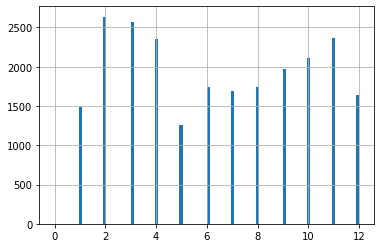

In [41]:
data['month'].hist(bins=100, range=(0,12))
data['month'].describe()


В основном зимой выкладывалтсь обьявления, летом активность снижается

### Определение факторов, влияющих на стоимость квартиры  
Начнем с общей площади.  

0.6536213939252808

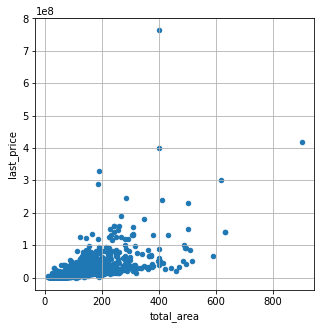

In [42]:
data.plot( kind='scatter',x= 'total_area', y='last_price', grid=True, style='o', figsize=(5, 5))

data['total_area'].corr(data['last_price'])


Жилая площадь

0.5856800396382067

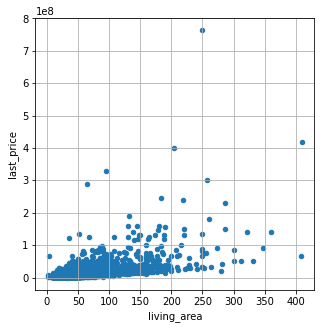

In [43]:
data.plot( kind='scatter',x= 'living_area', y='last_price', grid=True, style='o', figsize=(5, 5))

data['living_area'].corr(data['last_price'])


Зависимость меньше чем от общей площади, но так же чем больше жилая площадь, тем дороже

Зависимость цены от площади кухни

0.5145308032223361

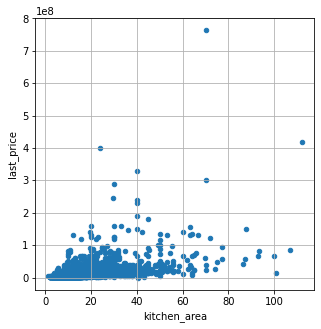

In [44]:
data.plot( kind='scatter',x= 'kitchen_area', y='last_price', grid=True, style='o', figsize=(5, 5))

data['kitchen_area'].corr(data['last_price'])

Корреляция еще меньше, чем у жилой площади.

Зависимость цены от количества комнат

0.3631905485065752

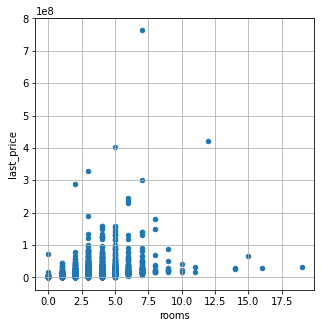

In [45]:
data.plot( kind='scatter',x= 'rooms', y='last_price', grid=True, style='o', figsize=(5, 5))

data['rooms'].corr(data['last_price'])

Корреляция слабая, количество комнат не сильно влияют на цену.

Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой);

<AxesSubplot:xlabel='floor_category', ylabel='last_price'>

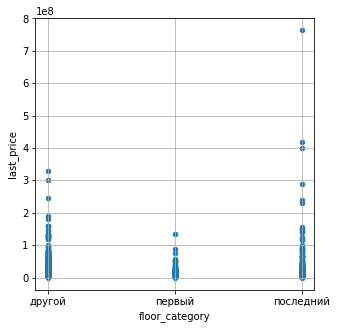

In [46]:
data.plot( kind='scatter',x= 'floor_category', y='last_price', grid=True, style='o', figsize=(5, 5))



Первый этаж самый дешевый, последний подороже. Самы дорогие этаже между первым и последним.

Зависимость цены от даты размещения (день недели, месяц, год)

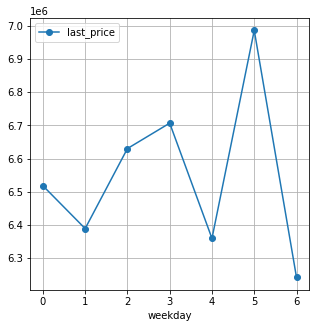

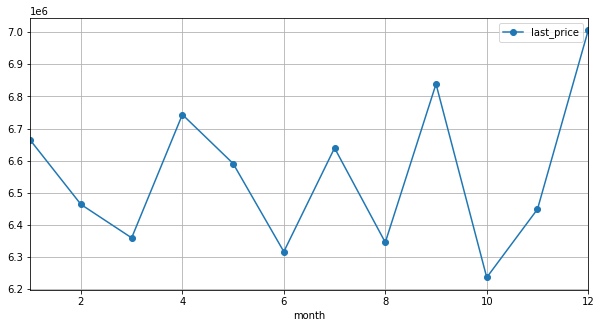

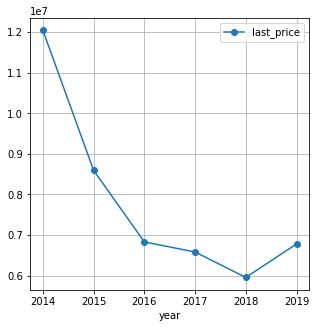

In [47]:
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Как видно на графике цены на квартиры падали до 2018 года, дальше пошел рост. Самые дорогие квартиры в декабре. Ну и квартиры опубликованные в субботу самые дорогие.

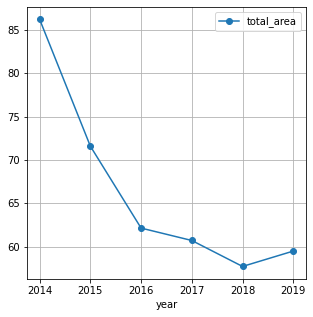

In [48]:
(
    data.pivot_table(index='year', values='total_area')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Динамика цены и площади продаваемых квартир

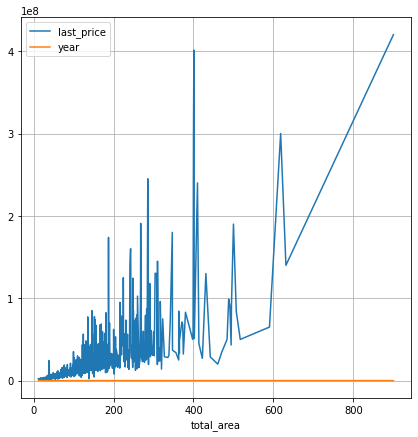

In [49]:
(
    data.pivot_table(index='total_area', values=['last_price', 'year'])
    .plot(grid=True, figsize=(7, 7))
)
plt.show()

По графику можно отметить следующее, есть резкие подьемы и спады, но в целом цена растет по мере увеличения площади и с течением времени.

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

(0.0, 1500.0)

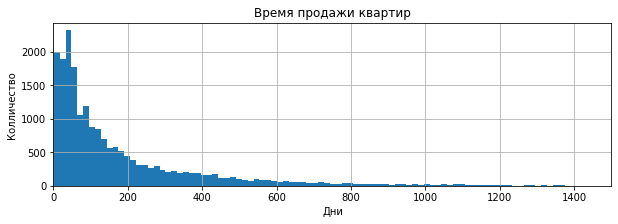

In [50]:
data['days_exposition'].hist(bins=100, figsize=(10, 3))
plt.title("Время продажи квартир")
plt.ylabel("Колличество")
plt.xlabel("Дни")
plt.xlim(0, 1500)

Text(0.5, 0, 'Дни')

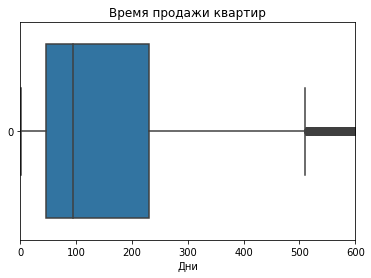

In [51]:
sns.boxplot(data=data['days_exposition'], orient="h")
plt.xlim(0, 600)
plt.title("Время продажи квартир")
plt.xlabel("Дни")

In [52]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по полученным данным, продажа в среднем занимает 95 дней. Если квартира продана за 45 дней считайте, это очень хорошо (возможно вы оценили квартиру ниже рынка, надо не забыть это проверить) Если же квартира не продалась за 231 дней, то что-то не так, это слишком долго.

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [53]:
data_pivot_locality_name = data.pivot_table(index='locality_name', values='sq_price', aggfunc=['count', 'median'])
data_pivot_locality_name.columns = ['count', 'median']
data_pivot_locality_name.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15651,104774.0
посёлок Мурино,586,86249.5
посёлок Шушары,439,76829.0
Всеволожск,398,65789.0
Пушкин,369,100000.0
Колпино,338,74723.5
посёлок Парголово,327,91642.0
Гатчина,307,67796.0
деревня Кудрово,299,91860.0


Самое дорогое жилье и больше всего предложений в Санкт-Петербурге, а самое дешевое и меньше всего предложений в Выборге.

### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. 

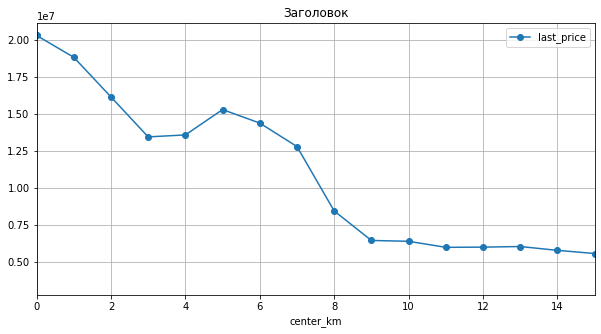

count    2.356500e+04
mean     2.292455e-06
std      5.514389e-06
min      0.000000e+00
25%      1.055409e-07
50%      1.739130e-06
75%      3.200000e-06
max      7.383101e-04
dtype: float64

In [54]:

data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5), title = 'Заголовок')
);
plt.show()
km_cost = data['center_km']/data['last_price']
km_cost.describe()

Судя по графику отдаляясь от центра квартиры дешевеют, в районе 7 км. идет обвал цен, судя по всему на этом центр Санкт-Петербурга заканчивается. Средняя цена за километр в Санкт-Петербурге составляет 2.29 млн.

### Общий вывод

В наших данных средняя площадь квартир составляет 60 кв.м.  
Больше всего однокомнатных квартир.  
Большинство зданий 5 и 9 этажные.  
Цена квартир зависит от площади, расстоянии до центра. Первый этаж значительно дешевле остальных вариантов.    
Судя по полученным данным, продажа в среднем занимает 95 дней. Если квартира продана за 45 дней считайте, это очень хорошо. Если же квартира не продалась за 231 дней, то что-то не так, это слишком долго.Есть большое число квартир, проданных всего за несколько дней после публикации. Также есть варианты, которые продавались несколько десятков месяцев.  
Дороже всего квадратный метр в Санкт-Петербурге - 104774
Дешевле всего квадратный метр в Выборге - 58158  
Самые дорогие квартиры в Санкт Петербурге, находятся в радиусе 7 км от центра.



